<h1>Socioeconomic Aspects of Global Renewable Energy: An Exploratory Data Analysis & Machine Learning Approach
</h1>

In [33]:
import pandas as pd

In [34]:
import numpy as np

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
import seaborn as sns

In [37]:
import statsmodels.api as sm

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [39]:
# Set visual display settings
sns.set(style='whitegrid')

<h2>Load dataset from csv</h2>

In [40]:
# load csv
df = pd.read_csv('complete_renewable_energy_dataset 2.csv')

In [41]:
# Get the first few rows of the data
df.head()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0


In [42]:
# Get the data shape
print(df.shape)
# 2500 rows & 56 columns

(2500, 56)


<h2>Data Cleaning: Drop duplicate rows</h2>

In [43]:
df = df.drop_duplicates()
# df

<h2>Information about the DataFrame</h2>

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 56 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  2500 non-null   object 
 1   Year                                     2500 non-null   int64  
 2   Energy Type                              2500 non-null   object 
 3   Production (GWh)                         2500 non-null   float64
 4   Installed Capacity (MW)                  2500 non-null   float64
 5   Investments (USD)                        2500 non-null   float64
 6   Population                               2500 non-null   int64  
 7   GDP                                      2500 non-null   float64
 8   Energy Consumption                       2500 non-null   float64
 9   Energy Exports                           2500 non-null   float64
 10  Energy Imports                           2500 no

<p>What is the relationship between investments in renewable energy and the installed capacity across different countries?</p>

<p>How do CO2 emissions vary with the proportion of energy derived from renewables in different countries?</p>

<p>What factors influence the number of renewable energy jobs created in various countries?</p>

<p>How does population size impact energy consumption and production in different regions?</p>

<h2>Descriptive Statistics</h2>

In [46]:
# Dataframe
df.describe()

,Year,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,Energy Imports,CO2 Emissions,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
count,2500.000000,2500.000000,2500.000000,2.500000e+03,2.500000e+03,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000
mean,2011.437600,48743.195073,24882.910674,4.956155e+09,7.458927e+08,1.010745e+14,495701.245158,50143.392627,50800.373871,491218.412643,...,50.736720,48.442085,50.280019,496.660400,50.431200,4978.93360,502040.891200,49.749110,0.512000,0.473600
std,6.895471,28340.915147,14463.459958,2.894789e+09,4.373146e+08,5.782363e+13,291419.017957,28833.333066,28740.851763,289783.733338,...,28.623766,28.798216,28.719483,296.181011,28.877168,2881.93256,293084.636148,28.924307,0.499956,0.499402
min,2000.000000,1053.354158,114.531639,5.886994e+06,1.255357e+06,5.603965e+10,1264.851083,1036.618008,1057.783513,1124.768458,...,0.104915,0.025281,0.025733,0.000000,0.000000,3.00000,494.000000,0.033829,0.000000,0.000000
25%,2006.000000,24309.656479,12282.213159,2.473145e+09,3.720811e+08,5.049265e+13,237300.546551,25146.745295,26347.461047,242894.720511,...,26.241437,23.519814,25.934406,234.000000,26.000000,2532.00000,244438.000000,23.968451,0.000000,0.000000
50%,2011.000000,47367.117600,24689.162460,4.961772e+09,7.515190e+08,1.027006e+14,496118.165272,49706.656938,50698.800022,475721.007886,...,50.850766,48.127673,51.398964,493.000000,51.000000,4992.50000,499151.000000,50.232069,1.000000,0.000000
75%,2017.250000,73079.452832,37438.443570,7.418384e+09,1.118019e+09,1.519604e+14,753779.282813,75567.191515,75807.642495,747649.446362,...,74.908485,73.324825,74.724073,755.000000,76.000000,7465.00000,765088.000000,74.354781,1.000000,1.000000
max,2023.000000,99937.503719,49997.387577,9.998292e+09,1.499494e+09,1.999223e+14,999618.512172,99952.509817,99912.213813,999816.500175,...,99.970526,99.901347,99.998838,999.000000,99.000000,9999.00000,999226.000000,99.988355,1.000000,1.000000


In [70]:
# drop column Country, Year and Energy Type 
socio_environ = df.drop(['Country', 'Year', 'Energy Type'], axis=1)

<h2>Sort the means in descending order and get the 22 highest factors based on mean</h2>

In [71]:
# Calculate the mean of all numeric columns
mean_values = socio_environ.mean()

# Sort the means in descending order
sorted_means = mean_values.sort_values(ascending=False).head(22)

# Display the sorted means
print("Mean of numeric columns ranked in descending order:")
print(sorted_means)

Mean of numeric columns ranked in descending order:
GDP                                        1.010745e+14
R&D Expenditure                            5.004689e+09
Investments (USD)                          4.956155e+09
Population                                 7.458927e+08
International Aid for Renewables           5.089057e+08
Energy Subsidies                           5.003271e+08
Renewable Energy Jobs                      5.028961e+05
Energy Sector Workforce                    5.020409e+05
Energy Consumption                         4.957012e+05
CO2 Emissions                              4.912184e+05
Energy Imports                             5.080037e+04
Energy Exports                             5.014339e+04
Production (GWh)                           4.874320e+04
Installed Capacity (MW)                    2.488291e+04
Number of Renewable Energy Publications    4.978934e+03
Annual Rainfall                            1.581673e+03
Energy Storage Capacity                    5.150320e

In [74]:
# Top 10 selected socio-economic indicators
socio_environ[['GDP', 'R&D Expenditure', 'Investments (USD)', 'Population', 'International Aid for Renewables', 'Energy Subsidies', 
               'Renewable Energy Jobs','Energy Sector Workforce', 'Energy Consumption', 'CO2 Emissions']].describe()

,GDP,R&D Expenditure,Investments (USD),Population,International Aid for Renewables,Energy Subsidies,Renewable Energy Jobs,Energy Sector Workforce,Energy Consumption,CO2 Emissions
count,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000
mean,1.010745e+14,5.004689e+09,4.956155e+09,7.458927e+08,5.089057e+08,5.003271e+08,502896.083600,502040.891200,495701.245158,491218.412643
std,5.782363e+13,2.878732e+09,2.894789e+09,4.373146e+08,2.914416e+08,2.902826e+08,286748.983941,293084.636148,291419.017957,289783.733338
min,5.603965e+10,1.224539e+06,5.886994e+06,1.255357e+06,2.190737e+06,1.308885e+06,1320.000000,494.000000,1264.851083,1124.768458
25%,5.049265e+13,2.535512e+09,2.473145e+09,3.720811e+08,2.576902e+08,2.503477e+08,253688.750000,244438.000000,237300.546551,242894.720511
50%,1.027006e+14,4.967879e+09,4.961772e+09,7.515190e+08,5.143714e+08,5.037123e+08,497165.500000,499151.000000,496118.165272,475721.007886
75%,1.519604e+14,7.515602e+09,7.418384e+09,1.118019e+09,7.679027e+08,7.478887e+08,754547.000000,765088.000000,753779.282813,747649.446362
max,1.999223e+14,9.998519e+09,9.998292e+09,1.499494e+09,9.992477e+08,9.999049e+08,999562.000000,999226.000000,999618.512172,999816.500175


In [82]:
# Selected from top 20 socio-economic indicators based on mean 
selected_factors = socio_environ[['GDP', 'R&D Expenditure', 'Investments (USD)', 'Population', 'International Aid for Renewables', 'Energy Subsidies', 'Renewable Energy Jobs','Energy Sector Workforce', 'Energy Consumption', 'CO2 Emissions', 'Energy Imports', 'Energy Exports', 'Production (GWh)', 'Installed Capacity (MW)', 
                                  'Number of Renewable Energy Publications', 'Energy Storage Capacity', 'Number of Research Institutions', 'Renewable Energy Patents', 'Export Incentives for Energy Equipment', 'Economic Freedom Index']]

In [97]:
# correlation
corr_matrix = selected_factors[['GDP', 'R&D Expenditure', 'Investments (USD)', 'Population']].corr()

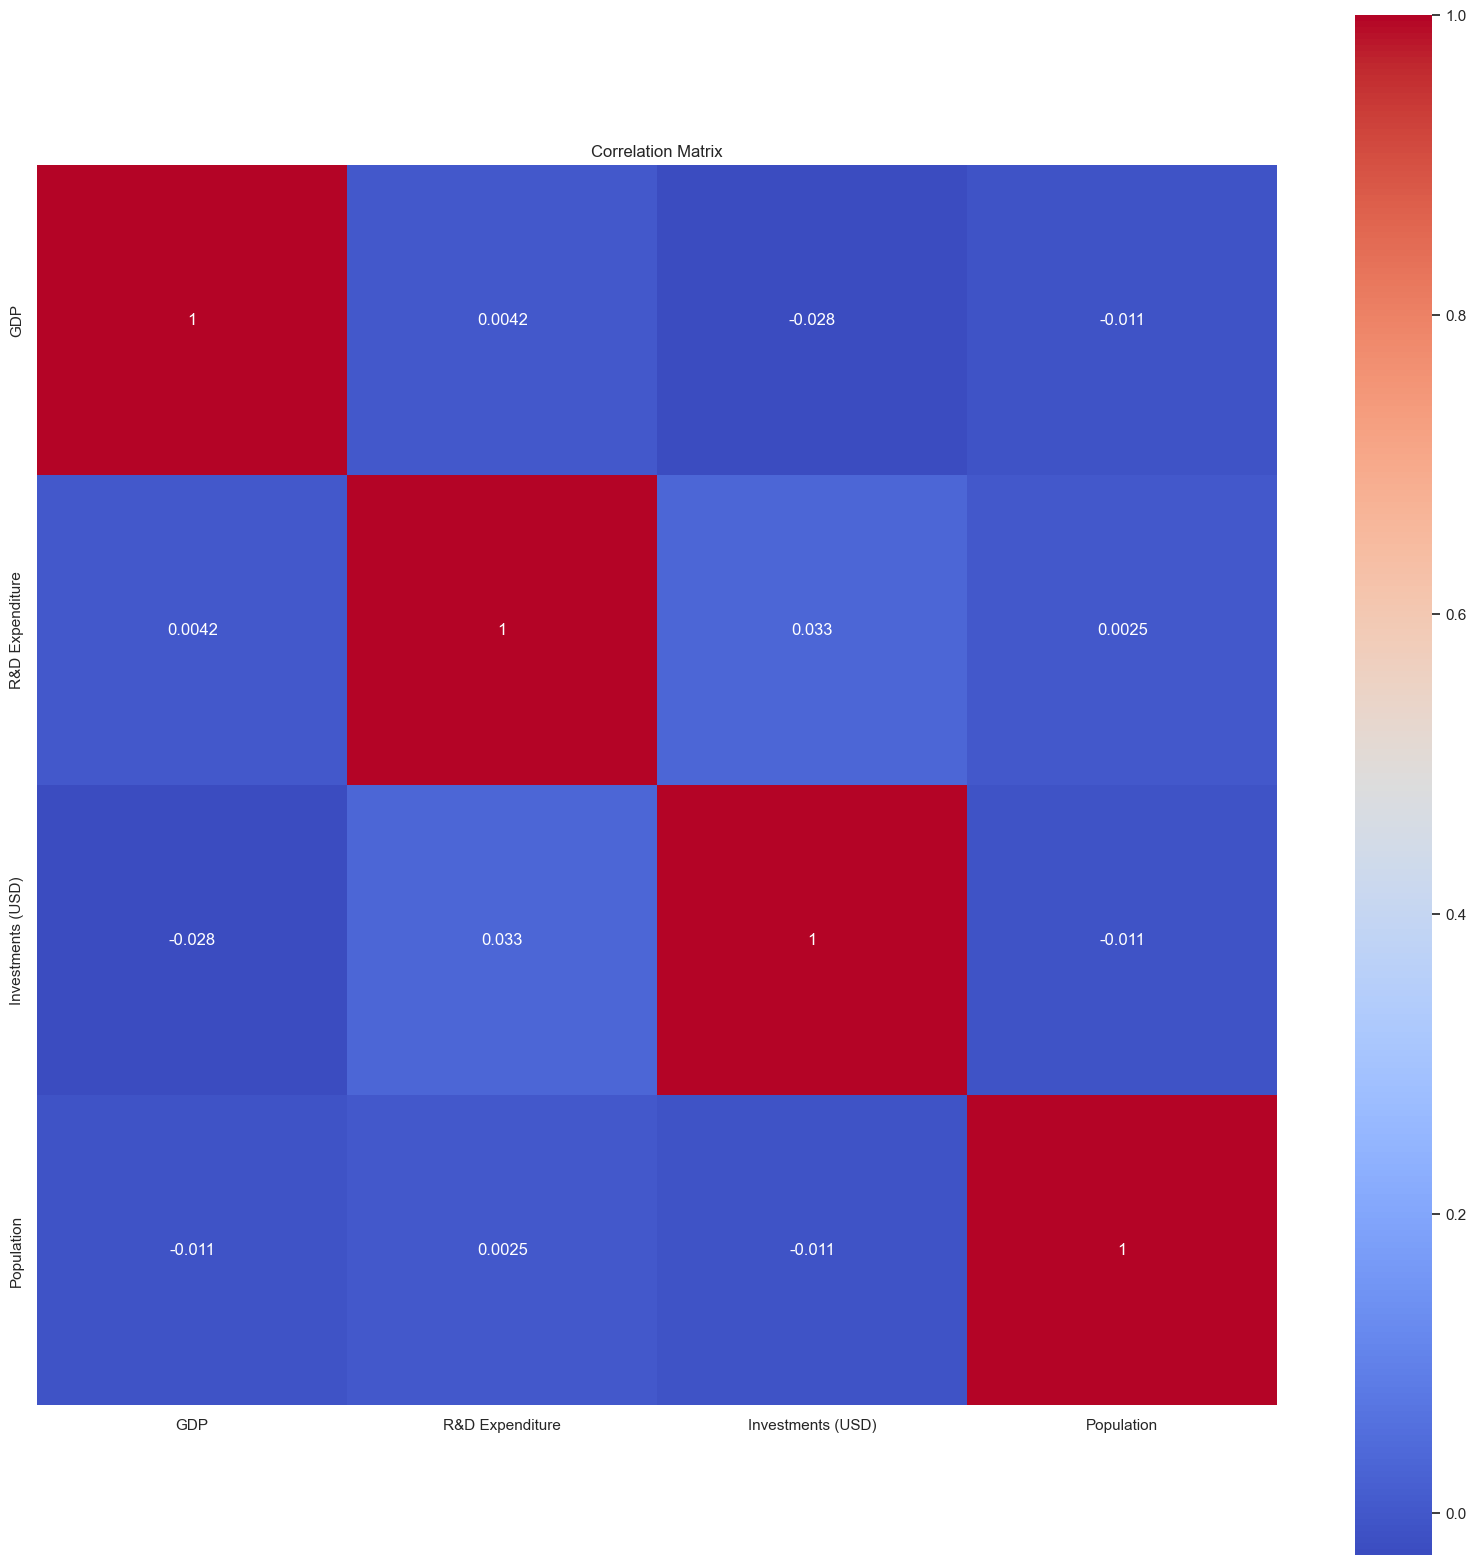

In [99]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

<h2>Univariate Analysis</h2>

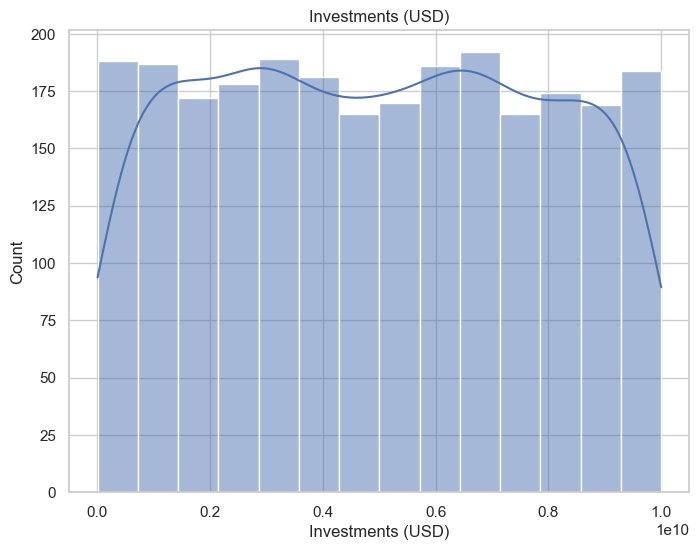

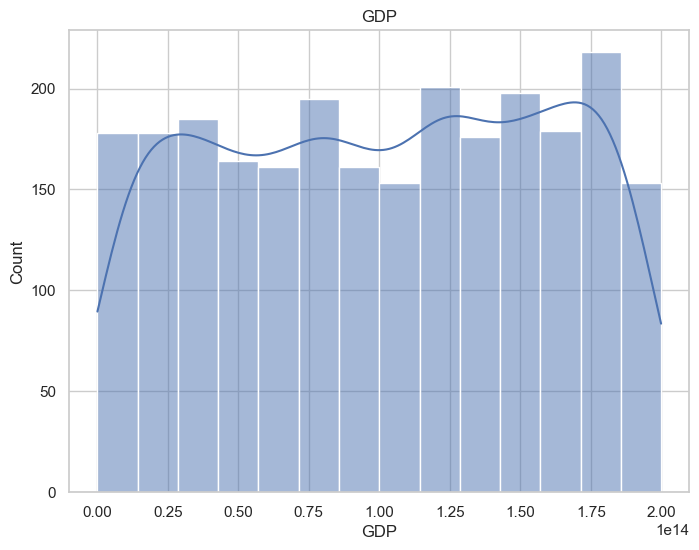

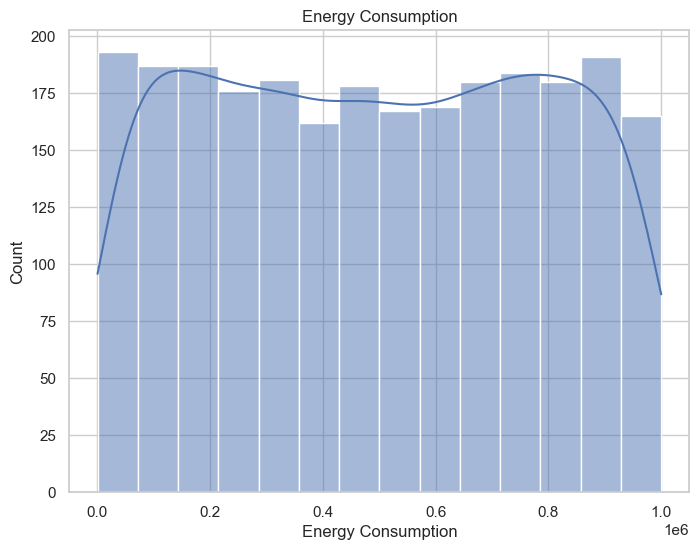

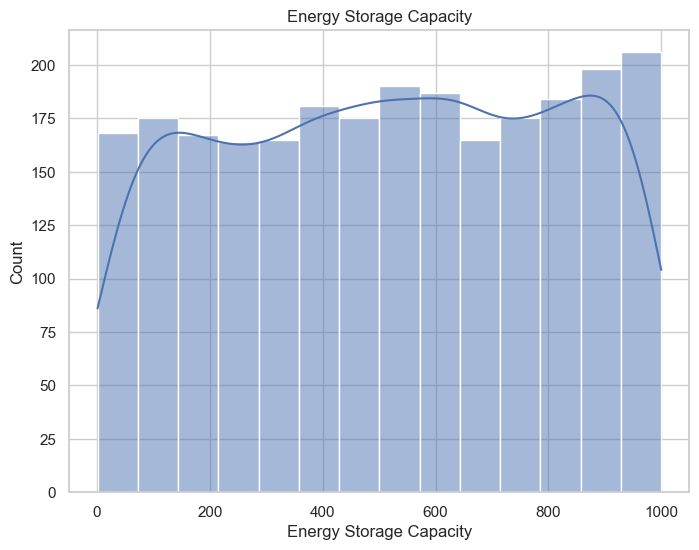

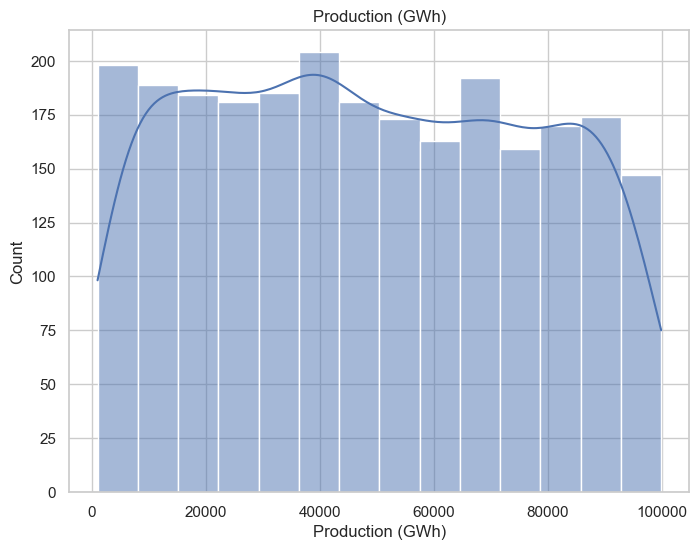

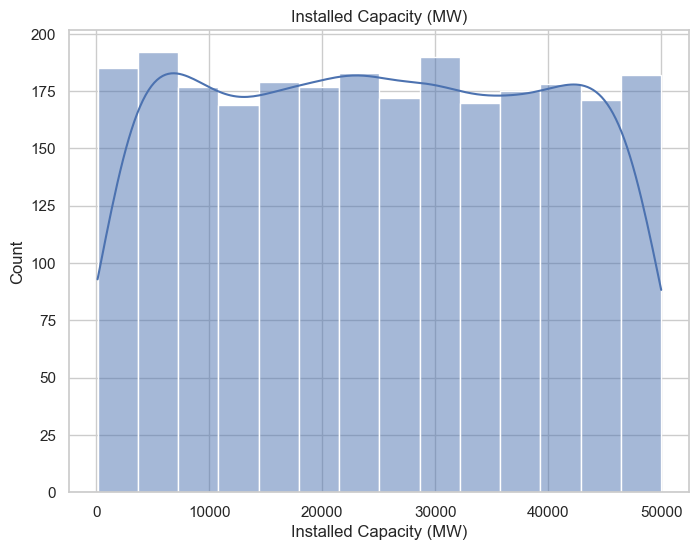

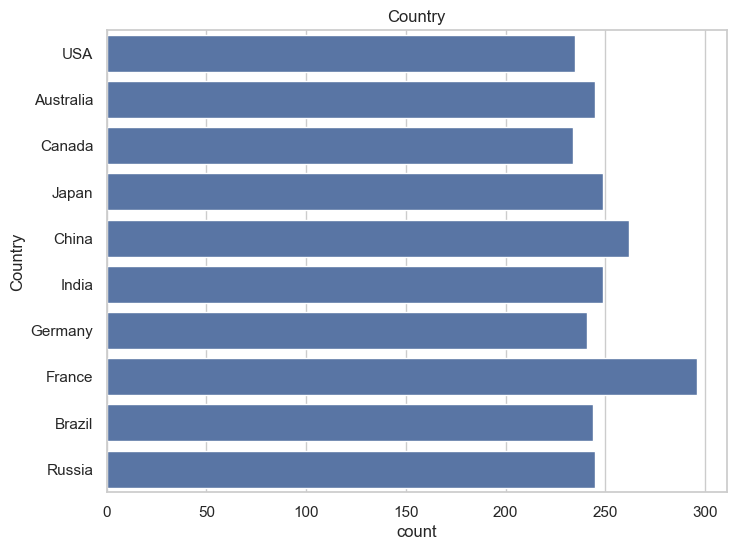

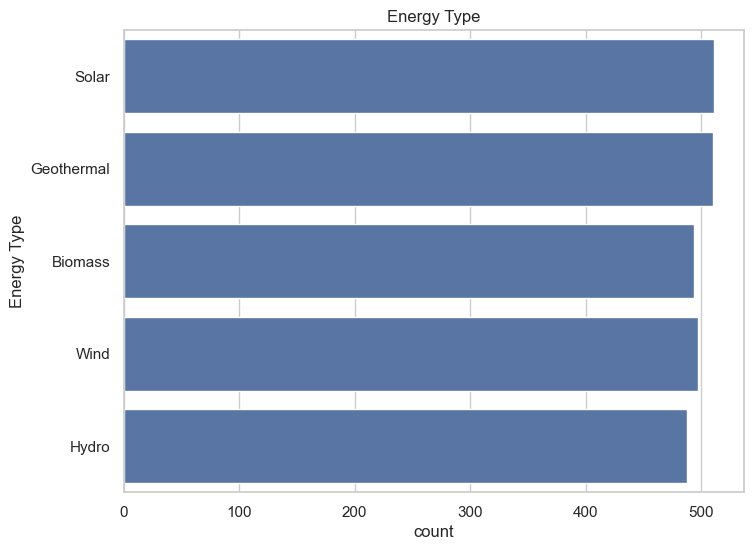

In [101]:
# Histograms for numerical variables
numerical_cols = ['Investments (USD)', 'GDP', 'Energy Consumption', 'Energy Storage Capacity', 'Production (GWh)', 'Installed Capacity (MW)']
for col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

# Bar plots for categorical variables
categorical_cols = ['Country', 'Energy Type']
for col in categorical_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(df[col])
    plt.title(col)
    plt.show()


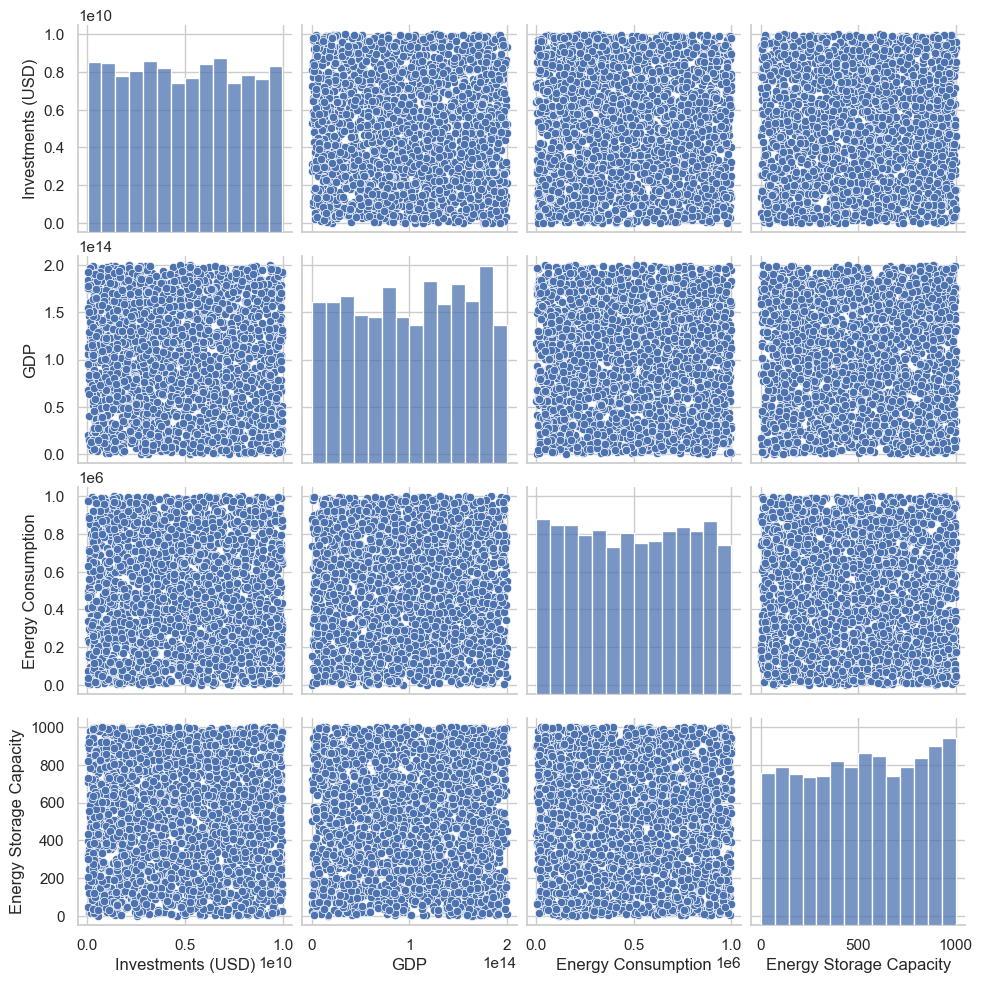

/Users/ai/CODES/PERSONAL/PY/DATAVIZ/sts/venv/lib/python3.9/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


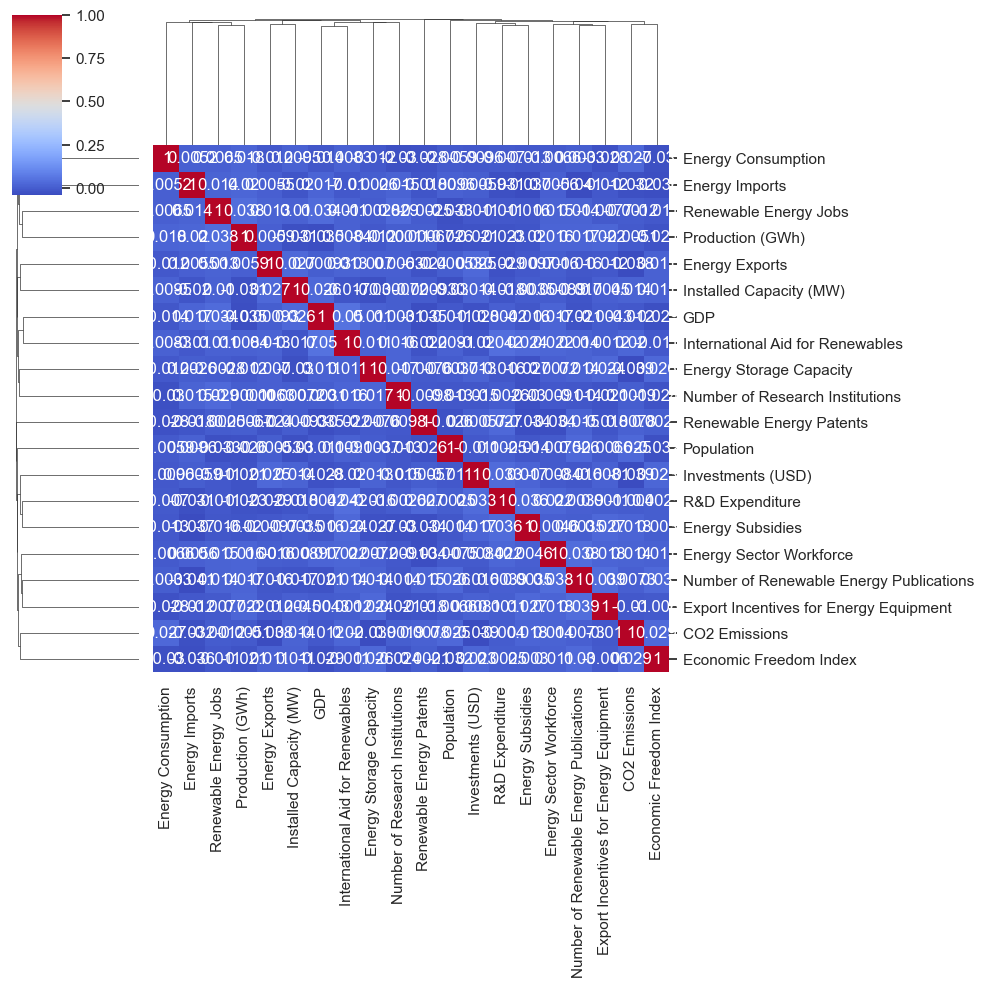

In [104]:
# Pairplot for relationships between multiple variables
sns.pairplot(selected_factors, vars=['Investments (USD)', 'GDP', 'Energy Consumption', 'Energy Storage Capacity'])
plt.show()

# Clustermap for relationships between multiple variables
sns.clustermap(selected_factors.corr(), annot=True, cmap='coolwarm', square=True)
plt.show()


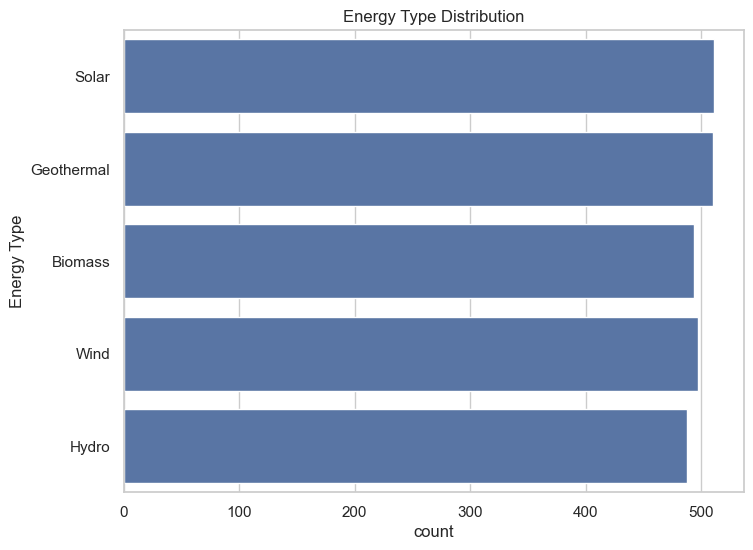

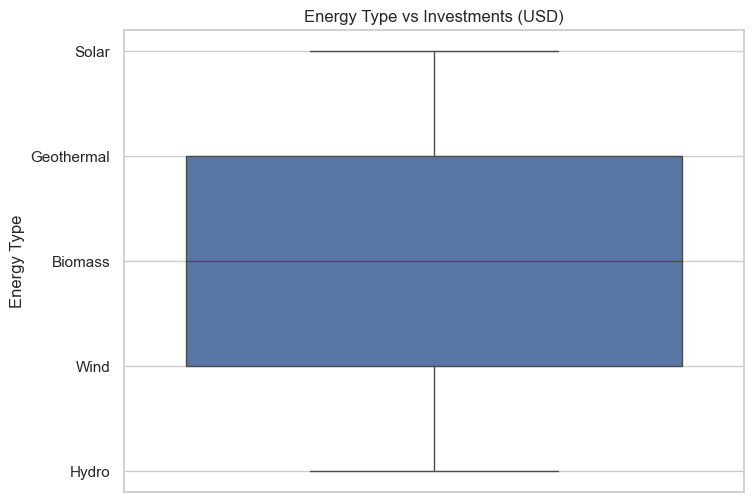

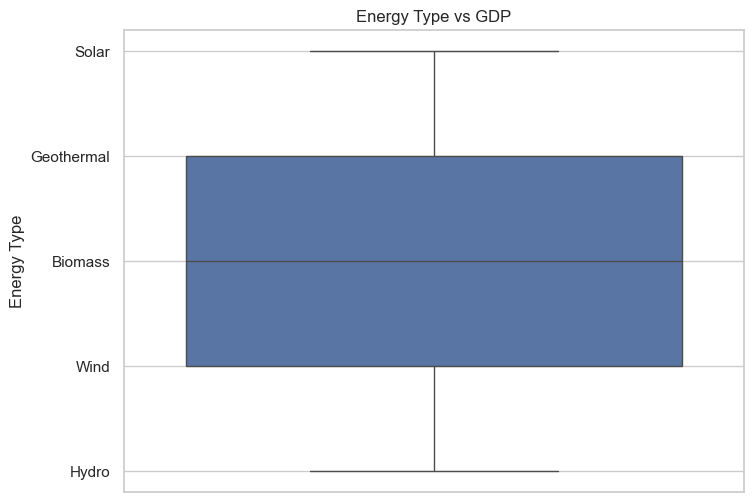

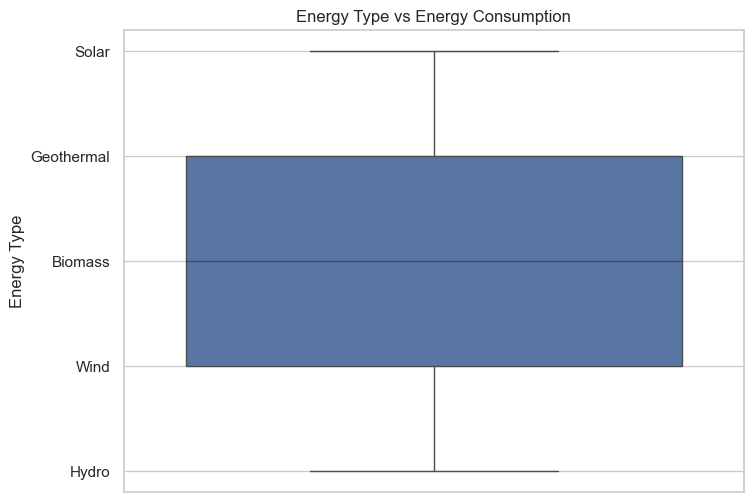

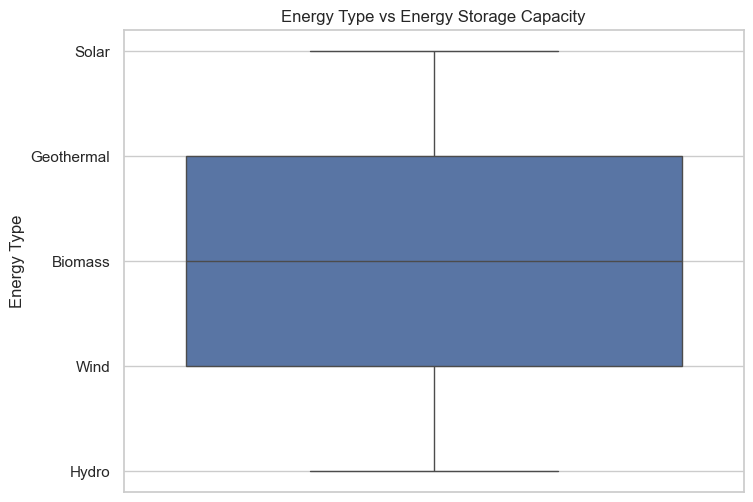

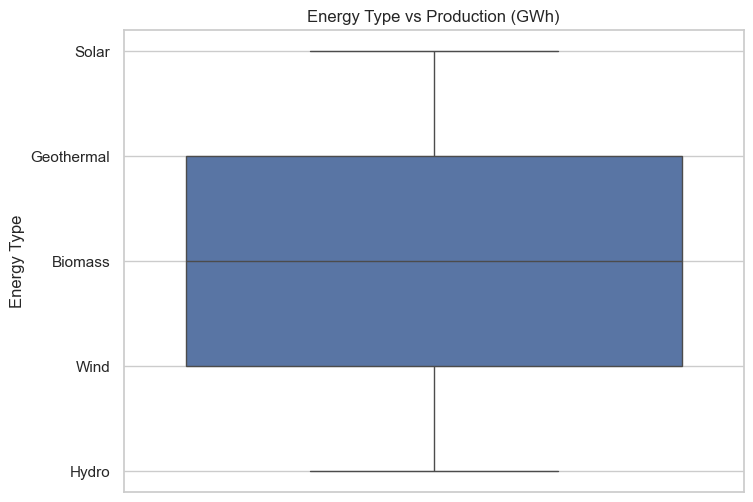

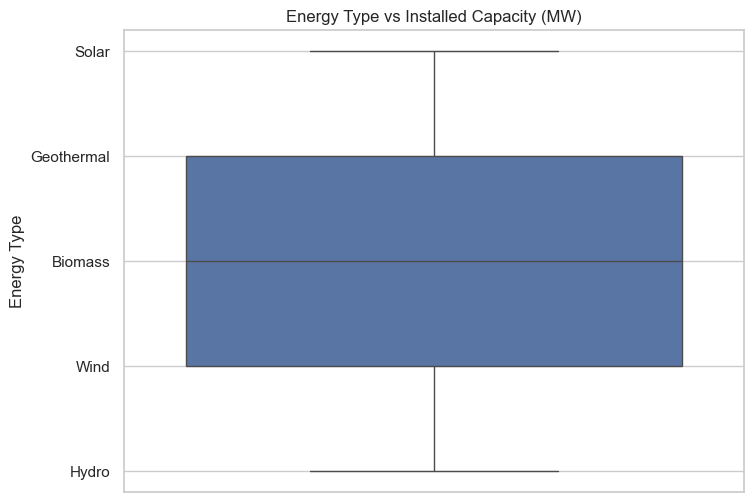

In [107]:
# Bar plot for energy type distribution
plt.figure(figsize=(8,6))
sns.countplot(df['Energy Type'])
plt.title('Energy Type Distribution')
plt.show()

# Box plots for energy type vs numerical variables
numerical_cols = ['Investments (USD)', 'GDP', 'Energy Consumption', 'Energy Storage Capacity', 'Production (GWh)', 'Installed Capacity (MW)']
for num_col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(df['Energy Type'])
    plt.title(f'Energy Type vs {num_col}')
    plt.show()


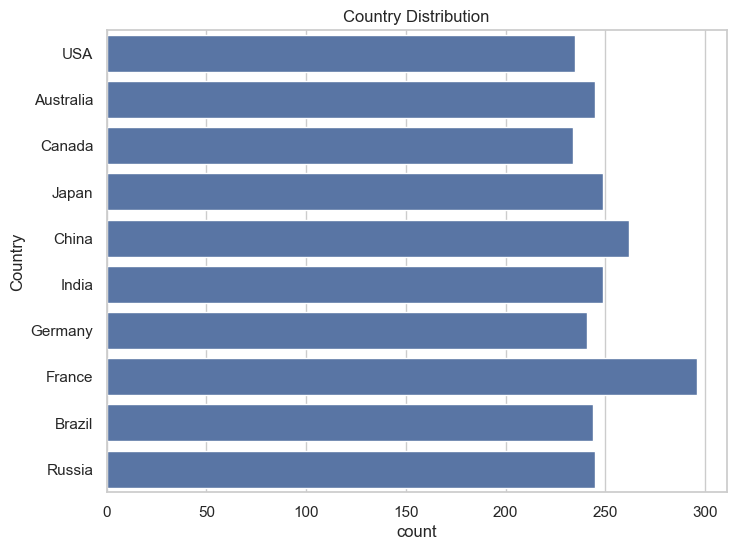

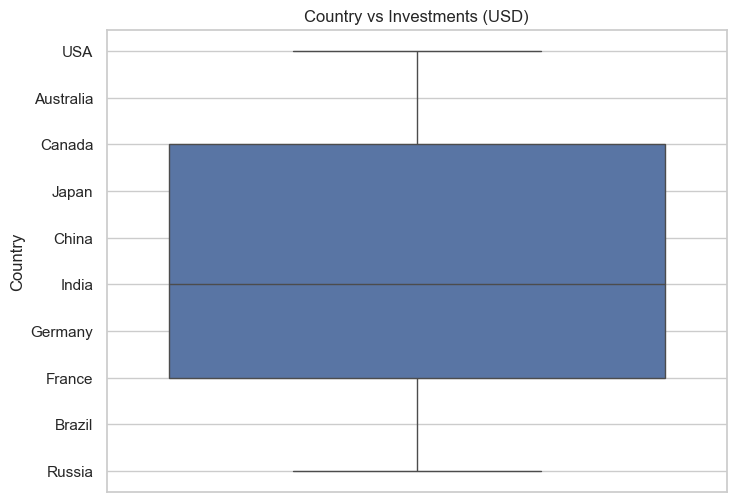

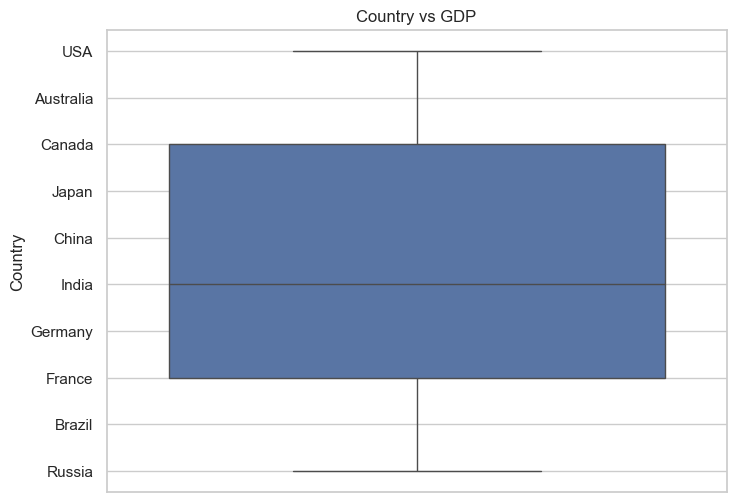

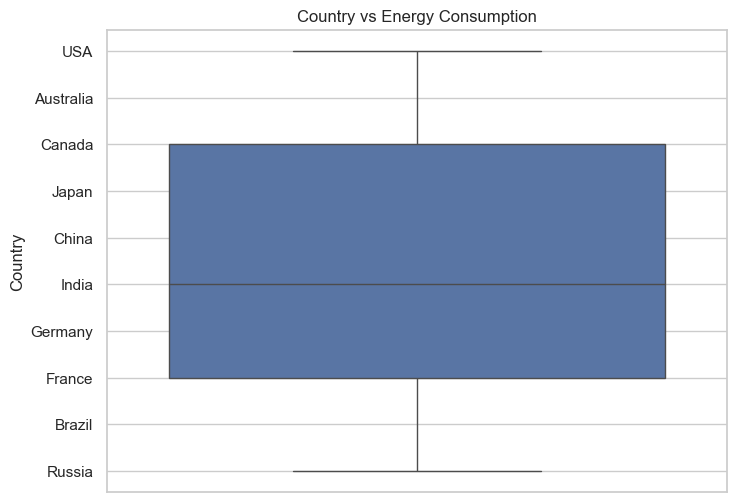

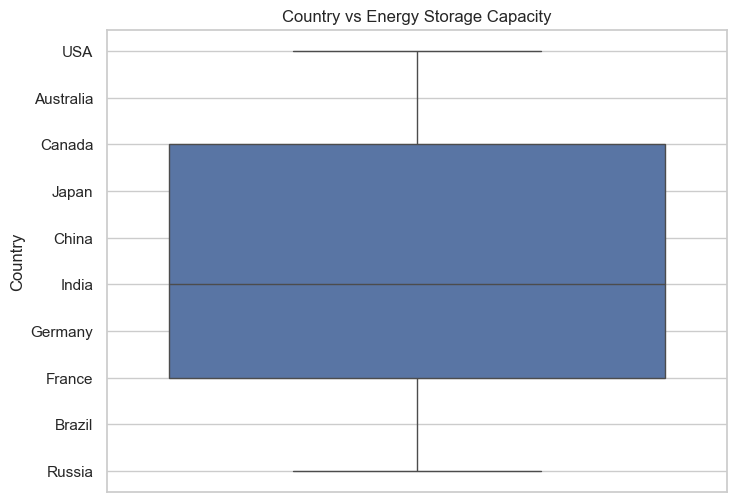

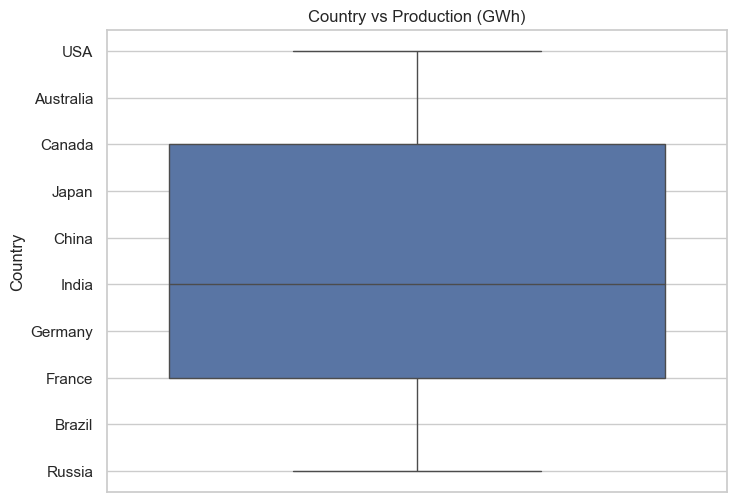

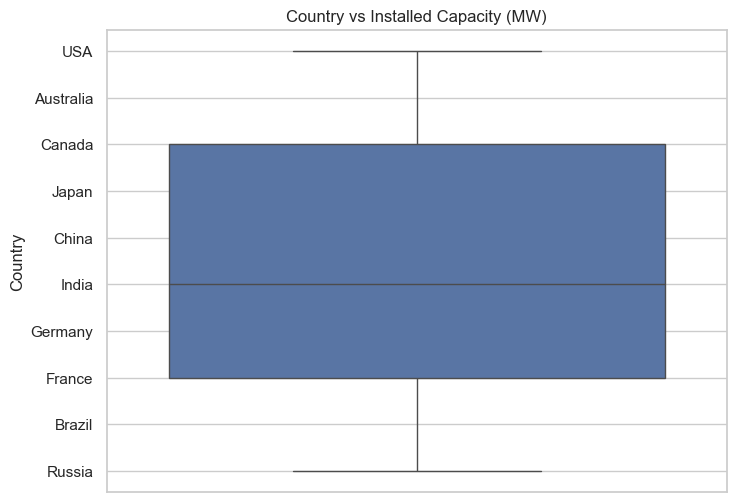

In [110]:
# Bar plot for country distribution
plt.figure(figsize=(8,6))
sns.countplot(df['Country'])
plt.title('Country Distribution')
plt.show()

# Box plots for country vs numerical variables
numerical_cols = ['Investments (USD)', 'GDP', 'Energy Consumption', 'Energy Storage Capacity', 'Production (GWh)', 'Installed Capacity (MW)']
for num_col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(df['Country'])
    plt.title(f'Country vs {num_col}')
    plt.show()


In [118]:
country_sales = df.groupby('Energy Type')['GDP'].mean()

In [119]:
country_sales

Energy Type
Biomass       1.024881e+14
Geothermal    1.035953e+14
Hydro         9.740357e+13
Solar         1.019313e+14
Wind          9.980618e+13
Name: GDP, dtype: float64

In [120]:
country_sales.sort_values(ascending=False)

Energy Type
Geothermal    1.035953e+14
Biomass       1.024881e+14
Solar         1.019313e+14
Wind          9.980618e+13
Hydro         9.740357e+13
Name: GDP, dtype: float64